# 금리 데이터 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Data Load

In [2]:
df = pd.read_csv('../data/preprocessed/4_GDP.csv')
rate_df = pd.read_csv('../data/added_features/한국은행 기준금리 및 여수신금리_10155548.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_18072/267040033.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/4_GDP.csv')


In [3]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류장 노드 ID,가장 가까운 버스 정류소번호,가장 가까운 버스 정류소명,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4


In [4]:
rate_df.drop(['통계표', '계정항목', '단위', '변환'], axis=1, inplace=True)
rate_df

,2001/01,2001/02,2001/03,2001/04,2001/05,2001/06,2001/07,2001/08,2001/09,2001/10,...,2023/09,2023/10,2023/11,2023/12,2024/01,2024/02,2024/03,2024/04,2024/05,2024/06
0,5.25,5.0,5.0,5.0,5.0,5.0,4.75,4.5,4.0,4.0,...,3.500,3.500,3.500,3.500,3.500,3.500,3.500,3.500,3.500,3.500
1,5.00,5.0,5.0,5.0,5.0,5.0,5.00,5.0,5.0,5.0,...,3.618,3.706,3.706,3.706,3.623,3.623,3.623,3.563,3.563,3.563


In [5]:
rate_df = rate_df.iloc[0]
rate_df

2001/01    5.25
2001/02    5.00
2001/03    5.00
2001/04    5.00
2001/05    5.00
           ... 
2024/02    3.50
2024/03    3.50
2024/04    3.50
2024/05    3.50
2024/06    3.50
Name: 0, Length: 282, dtype: float64

In [6]:
rate_df = pd.DataFrame(rate_df)
rate_df.reset_index(inplace=True)

rate_df.columns = ['년도월', '한국은행 기준금리']
rate_df

,년도월,한국은행 기준금리
0,2001/01,5.25
1,2001/02,5.00
2,2001/03,5.00
3,2001/04,5.00
4,2001/05,5.00
...,...,...
277,2024/02,3.50
278,2024/03,3.50
279,2024/04,3.50
280,2024/05,3.50


## '년도월'값 전처리
- yyyy/mm -> yyyymm

In [10]:
# yyyy/mm -> yyyymm

rate_df['년도월'] = rate_df['년도월'].str.replace('/', '').astype(int)
rate_df

,년도월,한국은행 기준금리
0,200101,5.25
1,200102,5.00
2,200103,5.00
3,200104,5.00
4,200105,5.00
...,...,...
277,202402,3.50
278,202403,3.50
279,202404,3.50
280,202405,3.50


In [11]:
df[['계약년월']]

,계약년월
0,201712
1,201712
2,201712
3,201801
4,201801
...,...
1128089,202307
1128090,202307
1128091,202308
1128092,202309


# 시각화

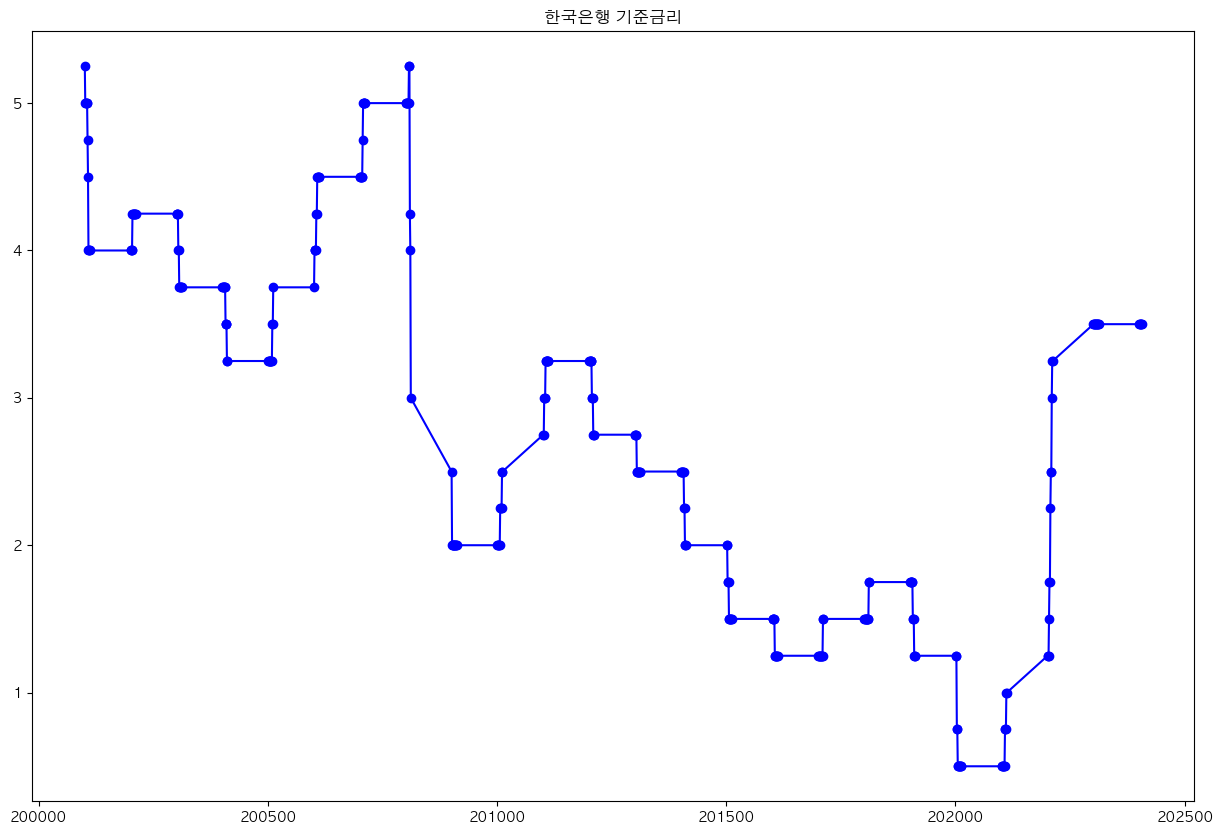

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(rate_df['년도월'], rate_df['한국은행 기준금리'], marker='o', linestyle='-', color='b')
plt.title('한국은행 기준금리')
plt.show()

# 원본 데이터에 적용

In [13]:
rate_mapping = pd.Series({ym: rate for ym, rate in zip(rate_df['년도월'], rate_df['한국은행 기준금리'])})

df['한국은행 기준금리'] = np.nan
df['한국은행 기준금리'] = df['한국은행 기준금리'].fillna(df['계약년월'].map(rate_mapping))

In [14]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류소번호,가장 가까운 버스 정류소명,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP,한국은행 기준금리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9,3.5
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9,3.5
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,8,1712792.9,3.5
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,9,1712792.9,3.5


In [17]:
df.to_csv('../data/preprocessed/5_interest_rate.csv', index=False)